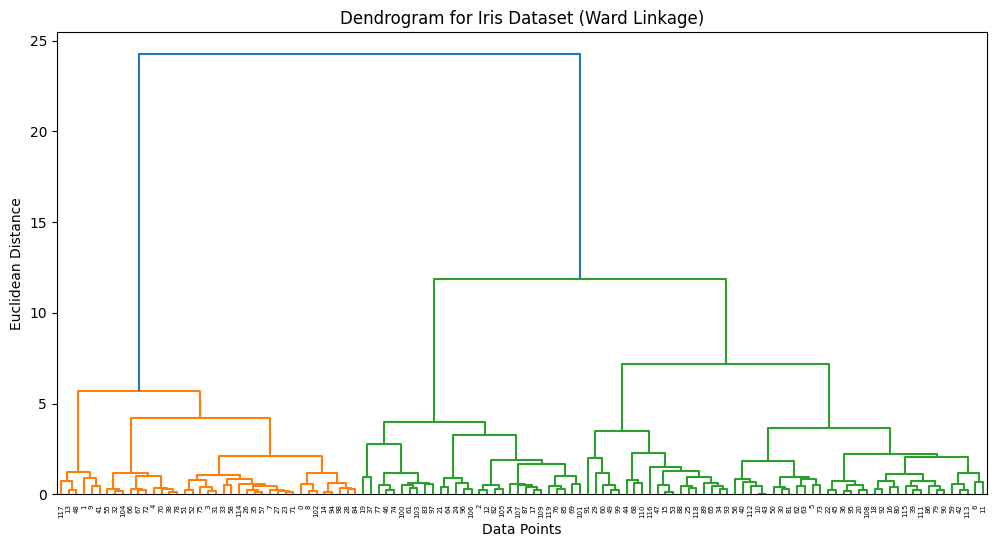


Evaluation Metrics for Test Data:
Confusion Matrix:
[[10  0  0]
 [ 0  6  3]
 [ 0  0 11]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.67      0.80         9
           2       0.79      1.00      0.88        11

    accuracy                           0.90        30
   macro avg       0.93      0.89      0.89        30
weighted avg       0.92      0.90      0.90        30


Silhouette Score: 0.417


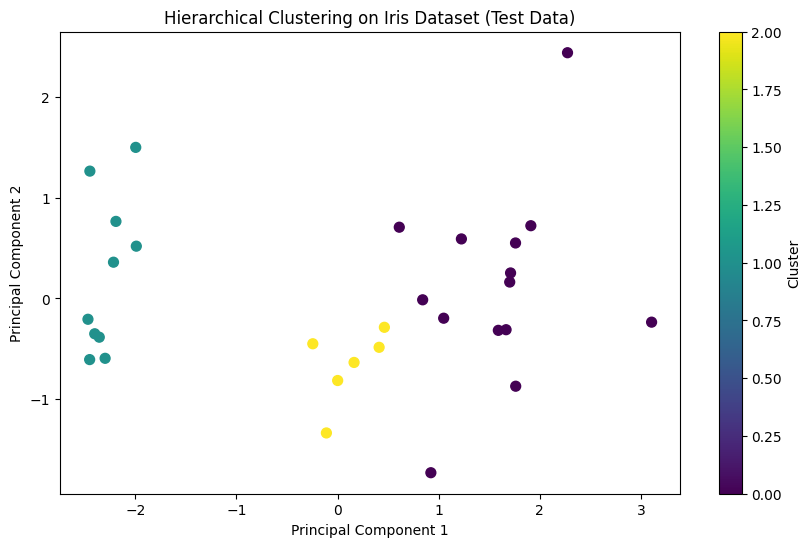


Feature Importance in Principal Components:
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
PC1           0.533443         -0.205103           0.579049          0.581441
PC2           0.326160          0.943974          -0.014501          0.048191


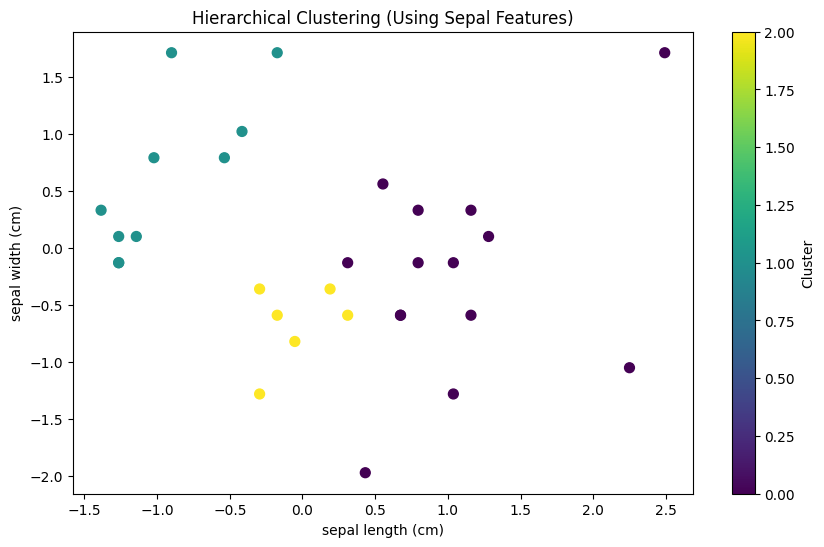

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score, confusion_matrix, classification_report
from scipy.stats import mode
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


plt.figure(figsize=(12, 6))
plt.title('Dendrogram for Iris Dataset (Ward Linkage)')
dend = dendrogram(linkage(X_train, method='ward'))
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()

optimal_clusters = 3


agg_clustering = AgglomerativeClustering(n_clusters=optimal_clusters, metric='euclidean', linkage='ward')
train_clusters = agg_clustering.fit_predict(X_train)


test_clusters = agg_clustering.fit_predict(X_test)


labels = np.zeros_like(test_clusters)
for i in range(optimal_clusters):
    mask = (test_clusters == i)
    labels[mask] = mode(y_test[mask])[0]

print("\nEvaluation Metrics for Test Data:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, labels))
print("\nClassification Report:")
print(classification_report(y_test, labels))


silhouette_avg = silhouette_score(X_test, test_clusters)
print(f"\nSilhouette Score: {silhouette_avg:.3f}")


from sklearn.decomposition import PCA


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=test_clusters, cmap='viridis', s=50)
plt.title('Hierarchical Clustering on Iris Dataset (Test Data)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()


print("\nFeature Importance in Principal Components:")
pca_components = pd.DataFrame(pca.components_, columns=feature_names, index=['PC1', 'PC2'])
print(pca_components)


plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=test_clusters, cmap='viridis', s=50)
plt.title('Hierarchical Clustering (Using Sepal Features)')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.colorbar(label='Cluster')
plt.show()